In [ ]:
#!/bin/bash
!kaggle datasets download tawfikelmetwally/employee-dataset
!unzip employee-dataset

Dataset URL: https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset
License(s): CC0-1.0
  0% 0.00/18.5k [00:00<?, ?B/s]
100% 18.5k/18.5k [00:00<00:00, 19.7MB/s]
Archive:  employee-dataset.zip
  inflating: Employee.csv            


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
df=pd.read_csv("Employee.csv")
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [ ]:
df.isna().sum()

,0
Education,0
JoiningYear,0
City,0
PaymentTier,0
Age,0
Gender,0
EverBenched,0
ExperienceInCurrentDomain,0
LeaveOrNot,0


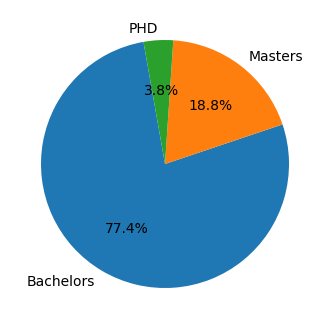

In [ ]:
# Education of employees
edu_count=df.Education.value_counts()
plt.figure(figsize=(4, 5))
plt.pie(edu_count, labels=edu_count.index, autopct='%1.1f%%', startangle=100)
plt.show()

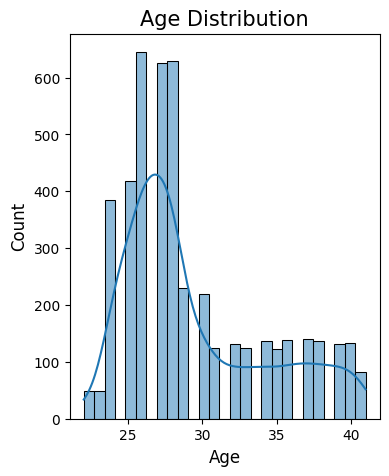

In [ ]:
# Age Distribution
plt.figure(figsize=(4, 5))

sns.histplot(df['Age'], kde=True)

plt.title('Age Distribution',fontsize=15)
plt.xlabel('Age',fontsize=12)
plt.ylabel('Count',fontsize=12)

plt.show()

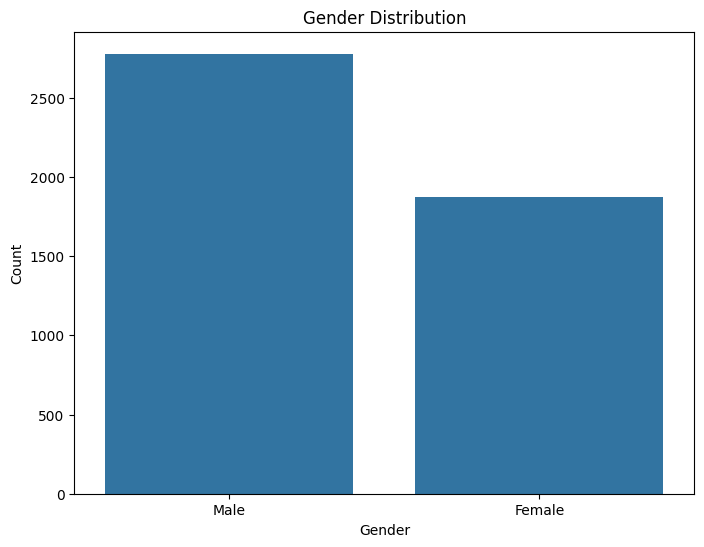

In [ ]:
# gender wise distribution
plt.figure(figsize=(8, 6))

sns.countplot(data=df, x='Gender')

plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

In [ ]:
#converting categorical columns to numeric
df['Gender']=df['Gender'].apply(lambda x: 1 if x=='Male' else 0)
df['EverBenched']=df['EverBenched'].apply(lambda x:1 if x=='Yes' else 0)

In [ ]:
#Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Education']=le.fit_transform(df['Education'])
df['City']=le.fit_transform(df['City'])
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1


In [ ]:
# Selecting Feature and target variable
X=df.drop('LeaveOrNot',axis=1)
y=df['LeaveOrNot']

In [ ]:
# Splitting train and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
# size of training and testing data
print("Size of training Data:",X_train.shape)
print("Size of testing Data:",X_test.shape)

Size of training Data: (3489, 8)
Size of testing Data: (1164, 8)


In [ ]:
#decision tree model
model=DecisionTreeClassifier(max_depth=3)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
# Making predictions using Decision Tree Classifier
y_pred=model.predict(X_test)
cr=classification_report(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)

print("Classification Report:")
print(cr)

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.94      0.87       775
           1       0.83      0.54      0.65       389

    accuracy                           0.81      1164
   macro avg       0.82      0.74      0.76      1164
weighted avg       0.81      0.81      0.80      1164



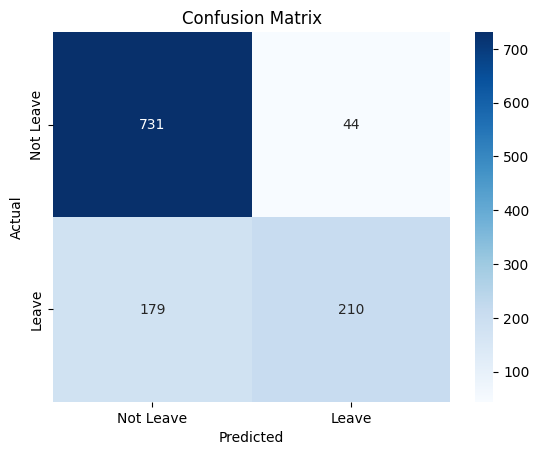

In [ ]:
# Confusion matrix plot
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Leave', 'Leave'], yticklabels=['Not Leave', 'Leave'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

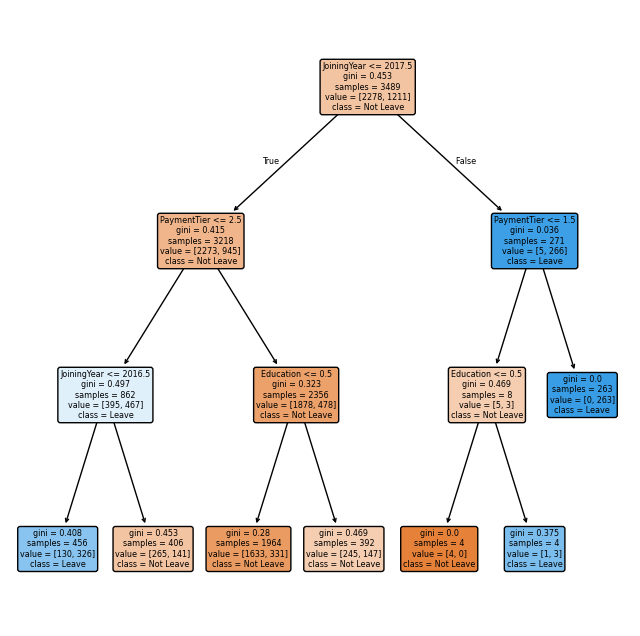

In [ ]:
# Plot the decision tree
plt.figure(figsize=(8, 8))
plot_tree(model, feature_names=X.columns, class_names=['Not Leave', 'Leave'], filled=True, rounded=True)
plt.show()